# 🏠 Loan Approval Prediction Project

![Python](https://img.shields.io/badge/Python-3.8%2B-blue)
![Scikit-Learn](https://img.shields.io/badge/Library-Scikit--Learn-orange)
![MLflow](https://img.shields.io/badge/Tracking-MLflow-blueviolet)
![Status](https://img.shields.io/badge/Status-Completed-success)

## 📌 Project Overview
This machine learning project aims to automate the loan eligibility process for financial institutions. By analyzing customer details provided in online application forms, the model predicts whether a loan should be **Approved (`Y`)** or **Rejected (`N`)**. 

The solution helps streamline decision-making, reduce manual effort, and manage risk effectively by identifying eligible applicants based on their financial and demographic profiles.



In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\AMIT - Assignments and Materials\AI ONL 104\ML\ML_Practise\train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### first 5 min

In [1397]:
df.shape

(614, 13)

In [1398]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1400]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [1401]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1402]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 1. Data Preprocessing
* **Missing Values:** Imputed categorical variables with **Mode** and numerical variables with **Median**.
* **Encoding:** Applied **One-Hot Encoding** for categorical features and **Label Encoding** for the target.
* **Balancing:** Utilized **SMOTE** (Synthetic Minority Over-sampling Technique) to address class imbalance.
* **Scaling:** Normalized features using `StandardScaler`.

### 2. Feature Engineering
* **Total Income:** Created a new feature combining `ApplicantIncome` and `CoapplicantIncome`.
* **Log Transformation:** Applied to `LoanAmount` and `TotalIncome` to normalize distributions.

# EDA , Data Cleaning and Data Preprocessing
---

In [1403]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### dealing with missing data 

In [1404]:
#detect nulls 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1405]:
# Loan_ID is just an identifier → drop it before training.
df = df.drop('Loan_ID', axis=1)

In [1406]:
# Numerical Imputation
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [1407]:
# Categorical Imputation (Mode)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [1408]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### detect duplicates

In [1409]:
# detect duplicates
df.duplicated().sum()

np.int64(0)

In [1410]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [1411]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [1412]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [1413]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [1414]:
df['Dependents'].unique()

array([0., 1., 2., 3.])

In [1415]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [1416]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [1417]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

## feature Engineering

In [1418]:
# ApplicantIncome + CoapplicantIncome can be combined into a TotalIncome feature.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [1419]:
#  Log Transformation (To handle Skewness)
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [1420]:
# create Loan_Term_Years feature
df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12
def classify_term(years):
    if years < 15:
        return 'Short_Term'
    elif years < 30:
        return 'Medium_Term'
    else:
        return 'Long_Term'

In [1421]:
df['Loan_Term'] = df['Loan_Amount_Term_Years'].apply(classify_term)

In [1422]:
# dropping original columns
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Loan_Amount_Term', 'Loan_Amount_Term_Years'], axis=1)

In [1423]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,Loan_Term
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,4.852030,8.674026,Long_Term
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,4.852030,8.714568,Long_Term
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,Long_Term
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,Long_Term
4,Male,No,0.0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,Long_Term
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,1.0,Rural,Y,4.262680,7.972466,Long_Term
610,Male,Yes,3.0,Graduate,No,1.0,Rural,Y,3.688879,8.320205,Medium_Term
611,Male,Yes,1.0,Graduate,No,1.0,Urban,Y,5.533389,9.025456,Long_Term
612,Male,Yes,2.0,Graduate,No,1.0,Urban,Y,5.231109,8.933664,Long_Term


## Encoding categorical features 

In [1424]:

# # List of categorical columns including the target
# cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
#             'Property_Area', 'Loan_Status']
# # Encoding categorical columns
# # label encoding
# label_maps = {}
# for col in cat_cols:
#     encoded, uniques = pd.factorize(df[col])
#     df[col] = encoded
#     label_maps[col] = uniques       


In [1425]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# B. One-Hot Encode Categorical Features
# We use drop_first=True to avoid multicollinearity
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area','Loan_Term']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [1426]:
df

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_Medium_Term,Loan_Term_Short_Term
0,1.0,1,4.852030,8.674026,True,False,False,False,False,False,False,False,True,False,False
1,1.0,0,4.852030,8.714568,True,True,True,False,False,False,False,False,False,False,False
2,1.0,1,4.189655,8.006368,True,True,False,False,False,False,True,False,True,False,False
3,1.0,1,4.787492,8.505323,True,True,False,False,False,True,False,False,True,False,False
4,1.0,1,4.948760,8.699515,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,7.972466,False,False,False,False,False,False,False,False,False,False,False
610,1.0,1,3.688879,8.320205,True,True,False,False,True,False,False,False,False,True,False
611,1.0,1,5.533389,9.025456,True,True,True,False,False,False,False,False,True,False,False
612,1.0,1,5.231109,8.933664,True,True,False,True,False,False,False,False,True,False,False


## Detect and Handle Outliers

In [1427]:
df

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_Medium_Term,Loan_Term_Short_Term
0,1.0,1,4.852030,8.674026,True,False,False,False,False,False,False,False,True,False,False
1,1.0,0,4.852030,8.714568,True,True,True,False,False,False,False,False,False,False,False
2,1.0,1,4.189655,8.006368,True,True,False,False,False,False,True,False,True,False,False
3,1.0,1,4.787492,8.505323,True,True,False,False,False,True,False,False,True,False,False
4,1.0,1,4.948760,8.699515,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,7.972466,False,False,False,False,False,False,False,False,False,False,False
610,1.0,1,3.688879,8.320205,True,True,False,False,True,False,False,False,False,True,False
611,1.0,1,5.533389,9.025456,True,True,True,False,False,False,False,False,True,False,False
612,1.0,1,5.231109,8.933664,True,True,False,True,False,False,False,False,True,False,False


In [1428]:
df.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'TotalIncome_log',
       'Gender_Male', 'Married_Yes', 'Dependents_1.0', 'Dependents_2.0',
       'Dependents_3.0', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Term_Medium_Term', 'Loan_Term_Short_Term'],
      dtype='object')

In [1429]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1430]:
# valid_terms = [10, 15, 20, 25, 30, 40]
# df = df[df['Loan_Amount_Term_Years'].isin(valid_terms)]


In [1431]:
# # detect outliers manually
# q1 = df['Loan_Amount_Term_Years'].quantile(0.25)
# q3 = df['Loan_Amount_Term_Years'].quantile(0.75)
# IQR = q3 - q1
# IQR

# wisk_min = q1 - 1.5 * IQR
# wisk_max = q3 + 1.5 * IQR

# df[(df['Loan_Amount_Term_Years'] < wisk_min) | (df['Loan_Amount_Term_Years'] > wisk_max)]
# sns.boxenplot(x=df['Loan_Amount_Term_Years'], color='lightblue')
# plt.show()

## Splitting (Train-Test Split)

In [1432]:
# Features
X = df.drop(columns=['Loan_Status'])
# Target
y = df['Loan_Status']


In [1433]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (429, 14)
X_test shape: (185, 14)


In [1434]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data ONLY
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Original Training Shape: {X_train.shape}")
print(f"Resampled Training Shape: {X_train.shape}")

Original Training Shape: (590, 14)
Resampled Training Shape: (590, 14)


## Scaling

In [1435]:
from sklearn.preprocessing import StandardScaler
# # Scale the data
# scaler = StandardScaler()
# numerical_cols = [col for col in X_train.columns ] # list comprehenssion for numerical columns
# # Fit on training data
# scaler.fit(X_train[numerical_cols])
# X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
# # Transform both training and testing data
# print("Scaled training data head:")
# display(X_train.head())

In [1436]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data head:")
display(X_train.head())

Scaled training data head:


,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_Medium_Term,Loan_Term_Short_Term
0,1.0,4.787492,8.359837,False,False,False,False,False,True,False,False,True,False,False
1,1.0,4.753590,8.605387,True,True,False,False,False,False,False,False,False,False,False
2,1.0,4.700480,8.236156,True,True,False,False,False,False,False,True,False,False,False
3,1.0,4.828314,8.646466,True,True,False,False,False,False,False,True,False,False,False
4,1.0,4.564348,8.183956,True,False,False,False,False,False,False,False,True,False,False


# Model Training & Tracking
I implemented a systematic training pipeline where **each algorithm was evaluated in two stages**:
1.  **Baseline Model:** Trained using default parameters (without `GridSearchCV`) to establish a benchmark.
2.  **Tuned Model:** Optimized using `GridSearchCV` to find the best hyperparameters via Cross-Validation.

The following models were implemented and tracked using **MLflow**:

* **Logistic Regression**
    * *Baseline:* Default settings.
    * *GridSearch:* Tuned L1 (Lasso) and L2 (Ridge) regularization strength (`C`).
* **Decision Tree Classifier**
    * *Baseline:* Default growth.
    * *GridSearch:* Tuned `max_depth` and split criteria (Gini vs. Entropy).
* **Random Forest Classifier**
    * *Baseline:* Default ensemble settings.
    * *GridSearch:* Tuned number of trees (`n_estimators`) and tree depth (`max_depth`).
* **AdaBoost Classifier**
    * *Baseline:* Default boosting.
    * *GridSearch:* Tuned learning rate and number of estimators.

# Different Models Training 
---

## MLFLOW

In [1437]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_mlflow(model, run_name, X_train, X_test, y_train, y_test, experiment_name="Loan_Prediction_Models"):
    """
    Trains a model and logs it to MLflow.
    Function renamed to 'run_mlflow' to avoid conflict with the library name.
    """
    
    # Set the experiment
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        # 1. Train
        model.fit(X_train, y_train)
        
        # 2. Predict
        y_pred = model.predict(X_test)
        
        # 3. Calculate Metrics
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred)
        }
        
        # 4. Log to MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(model, "model")
        
        # 5. Output for console verification
        print(f"--- Run: {run_name} ---")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"MLflow Run ID: {mlflow.active_run().info.run_id}\n")

## First : without GridSearchCV
---

### A.Logistic Regression  

In [1438]:
# # check balance of target variable in train and test sets
# def check_balance(y):
#     print("Counts:\n", y.value_counts())
#     print("\nPercentage:\n", y.value_counts(normalize=True) * 100)

# check_balance(y_train)
# check_balance(y_test)


In [1439]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [1440]:
# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [1441]:
# Make predictions
y_pred = logreg.predict(X_test)

In [1442]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [1443]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 39  19]
 [ 18 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        58
           1       0.85      0.86      0.85       127

    accuracy                           0.80       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.80      0.80      0.80       185



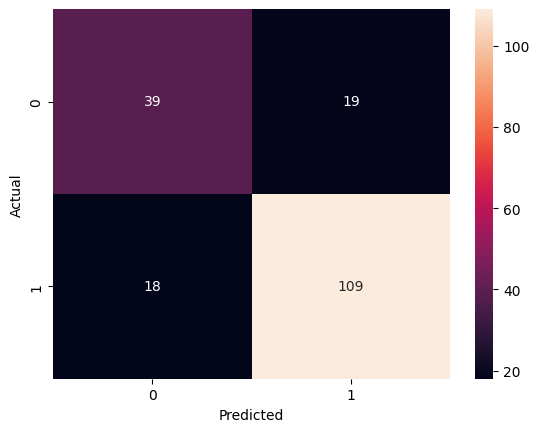

In [1444]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

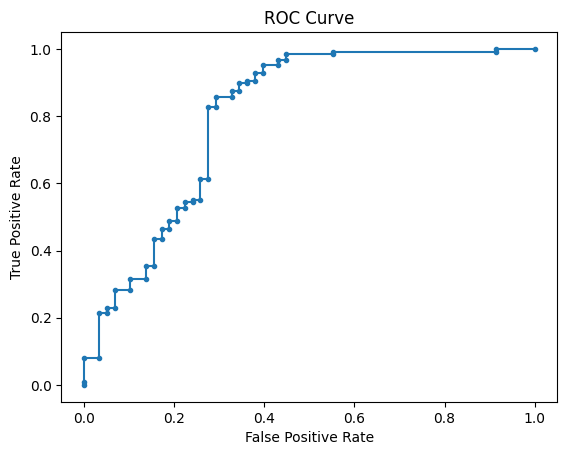

AUC Score: 0.802335052945968


In [1445]:
# ROC Curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

In [1446]:
# mlflow 
run_mlflow(logreg, "Logistic_Regression", X_train, X_test, y_train, y_test)

2025/12/15 20:24:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:24:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression ---
Accuracy: 0.8000
Recall: 0.8583
MLflow Run ID: 25ef149a487748f3848ae4bda755d14e



#### Train Logistic Regression with different penalties: L1, L2

In [1447]:
# L2 Regularization Ridge: :
logreg_l2_tuned = LogisticRegression( 
    penalty='l2' , 
    C=0.5 , 
    max_iter=1000 , 
    random_state=42 
)

# Fit the model
logreg_l2_tuned.fit(X_train, y_train)
# Make predictions
y_pred_l2_tuned = logreg_l2_tuned.predict(X_test)

print("--- Logistic Regression with L2 Regularization  ---")
print(classification_report(y_test, y_pred_l2_tuned))

--- Logistic Regression with L2 Regularization  ---
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        58
           1       0.86      0.87      0.87       127

    accuracy                           0.82       185
   macro avg       0.79      0.78      0.78       185
weighted avg       0.81      0.82      0.82       185



In [1448]:
#mlflow
run_mlflow(logreg_l2_tuned, "Logistic_Regression_L2_Tuned", X_train, X_test, y_train, y_test)

2025/12/15 20:24:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:24:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L2_Tuned ---
Accuracy: 0.8162
Recall: 0.8740
MLflow Run ID: 0b44c1146aaa4652be6796623943a23d



In [1449]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# L1 regularization (Lasso) :
logreg_l1 = LogisticRegression(
    penalty='l1',      
    C=0.5,               
    solver='liblinear', 
    max_iter=1000,       
    random_state=42      
)

logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

print(f"Accuracy with L1 : {accuracy_l1:.2f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred_l1))

Accuracy with L1 : 0.82

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        58
           1       0.87      0.87      0.87       127

    accuracy                           0.82       185
   macro avg       0.79      0.79      0.79       185
weighted avg       0.82      0.82      0.82       185



In [1450]:
#mlflow
run_mlflow(logreg_l2_tuned, "Logistic_Regression_L1_Tuned", X_train, X_test, y_train, y_test)

2025/12/15 20:24:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:24:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L1_Tuned ---
Accuracy: 0.8162
Recall: 0.8740
MLflow Run ID: d7ea09a3defe48bab2e84e2236658b68



### B.Decision Tree

In [1451]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [1452]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    295.0  295.0       1.0      590.0         590.0
_______________________________________________
Confusion Matrix: 
 [[295   0]
 [  0 295]]

Test Result:
Accuracy Score: 70.27%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.519481    0.833333  0.702703    0.676407      0.734936
recall      0.689655    0.708661  0.702703    0.699158      0.702703
f1-score    0.592593    0.765957  0.702703    0.679275      0.711605
support    58.000000  127.000000  0.702703  185.000000    185.000000
_______________________________________________
Conf

In [1453]:
# --- 1. Train Baseline Models (Gini & Entropy) ---

# Model with Gini Impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1454]:
# Model with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1455]:
# --- 2. Train Tuned Model (Adjusting Parameters) ---

# Adjusting max_depth, min_samples_split, and min_samples_leaf to prevent overfitting
dt_tuned = DecisionTreeClassifier(
    criterion='gini',       # You can choose 'gini' or 'entropy' here
    max_depth=5,            # Limit depth to keep the tree simple
    min_samples_split=10,   # Nodes must have 10 samples to split
    min_samples_leaf=5,     # Leaf nodes must have at least 5 samples
    random_state=42
)
dt_tuned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1456]:
def print_evaluation(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"================ {model_name} ================")
    print(classification_report(y_test, y_pred))
    print("\n")

# 1. Evaluate Baseline Gini Model
print_evaluation(dt_gini, "Baseline Model (Gini)", X_test, y_test)

# 2. Evaluate Baseline Entropy Model
print_evaluation(dt_entropy, "Baseline Model (Entropy)", X_test, y_test)

# 3. Evaluate Tuned Model
print_evaluation(dt_tuned, "Tuned Model (Max Depth = 5)", X_test, y_test)

================ Baseline Model (Gini) ================
              precision    recall  f1-score   support

           0       0.52      0.69      0.59        58
           1       0.83      0.71      0.77       127

    accuracy                           0.70       185
   macro avg       0.68      0.70      0.68       185
weighted avg       0.73      0.70      0.71       185



================ Baseline Model (Entropy) ================
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        58
           1       0.87      0.66      0.75       127

    accuracy                           0.70       185
   macro avg       0.69      0.72      0.68       185
weighted avg       0.75      0.70      0.71       185



================ Tuned Model (Max Depth = 5) ================
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        58
           1       0.82      0.78      0.80       127

 

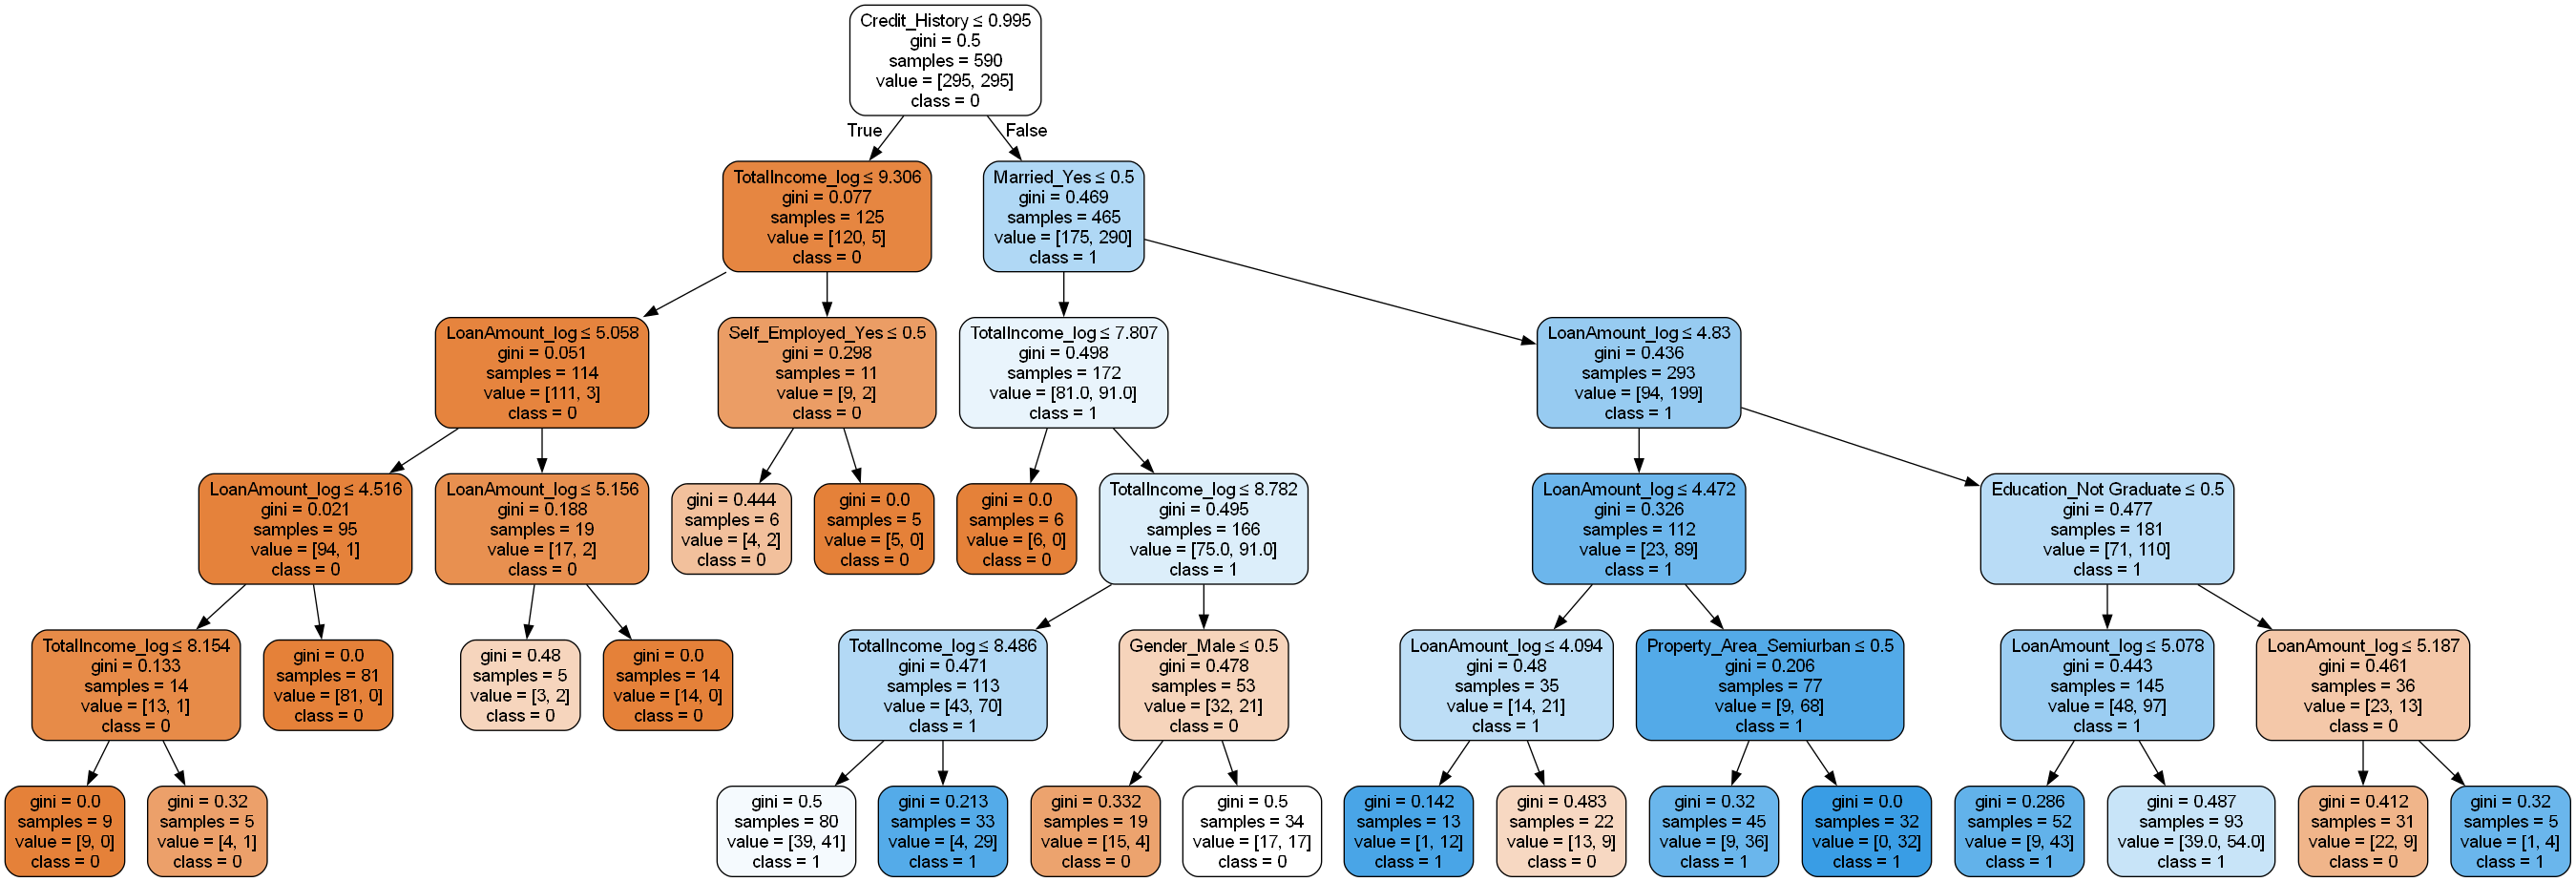

In [1457]:
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO  # Standard Python 3 import for StringIO

# 1. Select the model you want to visualize (e.g., the Tuned Model)
model_to_plot = dt_tuned  

# 2. Define your feature names
features = X.columns

# 3. Create the visualization data
dot_data = StringIO()

export_graphviz(
    model_to_plot,
    out_file=dot_data,
    feature_names=features,
    class_names=[str(c) for c in model_to_plot.classes_], # Adds Yes/No labels
    filled=True,
    rounded=True,
    special_characters=True
)

# 4. Generate the graph
# pydot.graph_from_dot_data returns a list, so we grab the first element [0]
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# 5. Display the Image
Image(graph[0].create_png())

In [1458]:
# Adjusting max_depth, min_samples_split, and min_samples_leaf to prevent overfitting
dt_tuned = DecisionTreeClassifier(
    criterion='entropy',       # You can choose 'gini' or 'entropy' here
    max_depth=5,            # Limit depth to keep the tree simple
    min_samples_split=10,   # Nodes must have 10 samples to split
    min_samples_leaf=5,     # Leaf nodes must have at least 5 samples
    random_state=42
)
dt_tuned.fit(X_train, y_train)
print_evaluation(dt_tuned, "Tuned Model (Max Depth = 5)", X_test, y_test)

================ Tuned Model (Max Depth = 5) ================
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        58
           1       0.84      0.89      0.86       127

    accuracy                           0.81       185
   macro avg       0.78      0.76      0.76       185
weighted avg       0.80      0.81      0.80       185





In [1459]:
#mlflow
run_mlflow(dt_tuned, "Decision_Tree_Tuned", X_train, X_test, y_train, y_test)

2025/12/15 20:24:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Decision_Tree_Tuned ---
Accuracy: 0.8054
Recall: 0.8898
MLflow Run ID: 96afcc312bcb4f31b5385bf82b8f0458



### C.Random Forest

In [1460]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)


print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    295.0  295.0       1.0      590.0         590.0
_______________________________________________
Confusion Matrix: 
 [[295   0]
 [  0 295]]

Test Result:
Accuracy Score: 75.14%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.600000    0.824000  0.751351    0.712000      0.753773
recall      0.620690    0.811024  0.751351    0.715857      0.751351
f1-score    0.610169    0.817460  0.751351    0.713815      0.752472
support    58.000000  127.000000  0.751351  185.000000    185.000000
_______________________________________________
Conf

In [1461]:
# 1. Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42 , max_depth=7, min_samples_split=5, min_samples_leaf=2 , criterion='gini')
# 2. Fit the model

In [1462]:
# 2. Fit the model on the training data
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,7
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1463]:
# 3. Predict on the test data
y_pred = rf_model.predict(X_test)

In [1464]:
# 4. Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.7730

Confusion Matrix:
[[ 36  22]
 [ 20 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        58
           1       0.83      0.84      0.84       127

    accuracy                           0.77       185
   macro avg       0.74      0.73      0.73       185
weighted avg       0.77      0.77      0.77       185



In [1465]:
#mlflow
run_mlflow(rf_model, "Random_Forest_tuned", X_train, X_test, y_train, y_test)

2025/12/15 20:25:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:25:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Random_Forest_tuned ---
Accuracy: 0.7730
Recall: 0.8425
MLflow Run ID: 572f445f5b4841db91676e43d581ab25



### D.Ada Boosting 

In [1466]:
from sklearn.ensemble import AdaBoostClassifier
# 1. Initialize the AdaBoost Classifier
# n_estimators: The number of weak learners (trees) to train.
# learning_rate: Controls how much each tree contributes to the final decision.
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)

In [1467]:
# 2. Fit the model on the training data
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,0.01
,algorithm,'deprecated'
,random_state,42


In [1468]:
# 3. Predict on the test data
y_pred = ada_model.predict(X_test)

In [1469]:
# 4. Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred)
conf_matrix_ada = confusion_matrix(y_test, y_pred)
class_report_ada = classification_report(y_test, y_pred)

print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_ada)
print("\nClassification Report:")
print(class_report_ada)

AdaBoost Accuracy: 0.8486

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [1470]:
#mlflow
run_mlflow(ada_model, "AdaBoost_Tuned", X_train, X_test, y_train, y_test)

2025/12/15 20:25:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:25:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: AdaBoost_Tuned ---
Accuracy: 0.8486
Recall: 0.9843
MLflow Run ID: fce6becb214740388839a1c86ea73b0c



## Second : with GridSearchCV
---

### A.Logistic Regrission

#### Train Logistic Regression with different penalties: L1, L2

In [1471]:
# with L2 penalty with GridsearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Define the base logistic regression model
logreg_base = LogisticRegression(max_iter=1000, random_state=42, penalty='l2')
# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]}
# Define StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_base,
    param_grid=param_grid,
    scoring='recall', 
    cv=cv,
    verbose=3,
    n_jobs=-1 
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        58
           1       0.85      0.86      0.85       127

    accuracy                           0.80       185
   macro avg       0.77      0.77      0.77       185
weighted avg       0.80      0.80      0.80       185



In [1472]:
#mlflow with gridsearchcv best model
run_mlflow(
    model=best_logreg, 
    run_name="Logistic_Regression_L2_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)


2025/12/15 20:25:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:25:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L2_GridSearch ---
Accuracy: 0.8000
Recall: 0.8583
MLflow Run ID: f44cb3a063604fcca96c816c489b3d31



In [1473]:
# with L1 penalty with GridsearchCV

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg_base_l1 = LogisticRegression(
    max_iter=1000,
    random_state=42,
    penalty='l1',
    solver='liblinear',
    
)

param_grid_l1 = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

cv_l1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_l1 = GridSearchCV(
    estimator=logreg_base_l1,
    param_grid=param_grid_l1,
    scoring='recall',
    cv=cv_l1,
    n_jobs=-1
)

grid_search_l1.fit(X_train, y_train)

print(f"Best Recall (CV): {grid_search_l1.best_score_:.4f}")

best_logreg_l1 = grid_search_l1.best_estimator_
y_pred_best_l1 = best_logreg_l1.predict(X_test)
print(classification_report(y_test, y_pred_best_l1))

Best Recall (CV): 0.9661
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        58
           1       0.84      0.98      0.91       127

    accuracy                           0.86       185
   macro avg       0.89      0.79      0.81       185
weighted avg       0.87      0.86      0.85       185



In [1474]:
# mlflow 
run_mlflow(
    model=best_logreg_l1, 
    run_name="Logistic_Regression_L1_GridSearch", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/15 20:25:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:25:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Logistic_Regression_L1_GridSearch ---
Accuracy: 0.8595
Recall: 0.9843
MLflow Run ID: 5dd8315fe3794a10af55bd7d93824452



### B.Decision Tree

In [1475]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

#
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 99.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.993243    0.996599  0.994915    0.994921      0.994921
recall       0.996610    0.993220  0.994915    0.994915      0.994915
f1-score     0.994924    0.994907  0.994915    0.994915      0.994915
support    295.000000  295.000000  0.994915  590.000000    590.000000
_______________________________________________
Confusion Matrix: 
 [[294   1]
 [  2 293]]

Test Result:
Accuracy Score: 71.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.532468    0.842593  0.713514    0.687530      0.745364
recall      0.

In [1476]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Loan_Status")

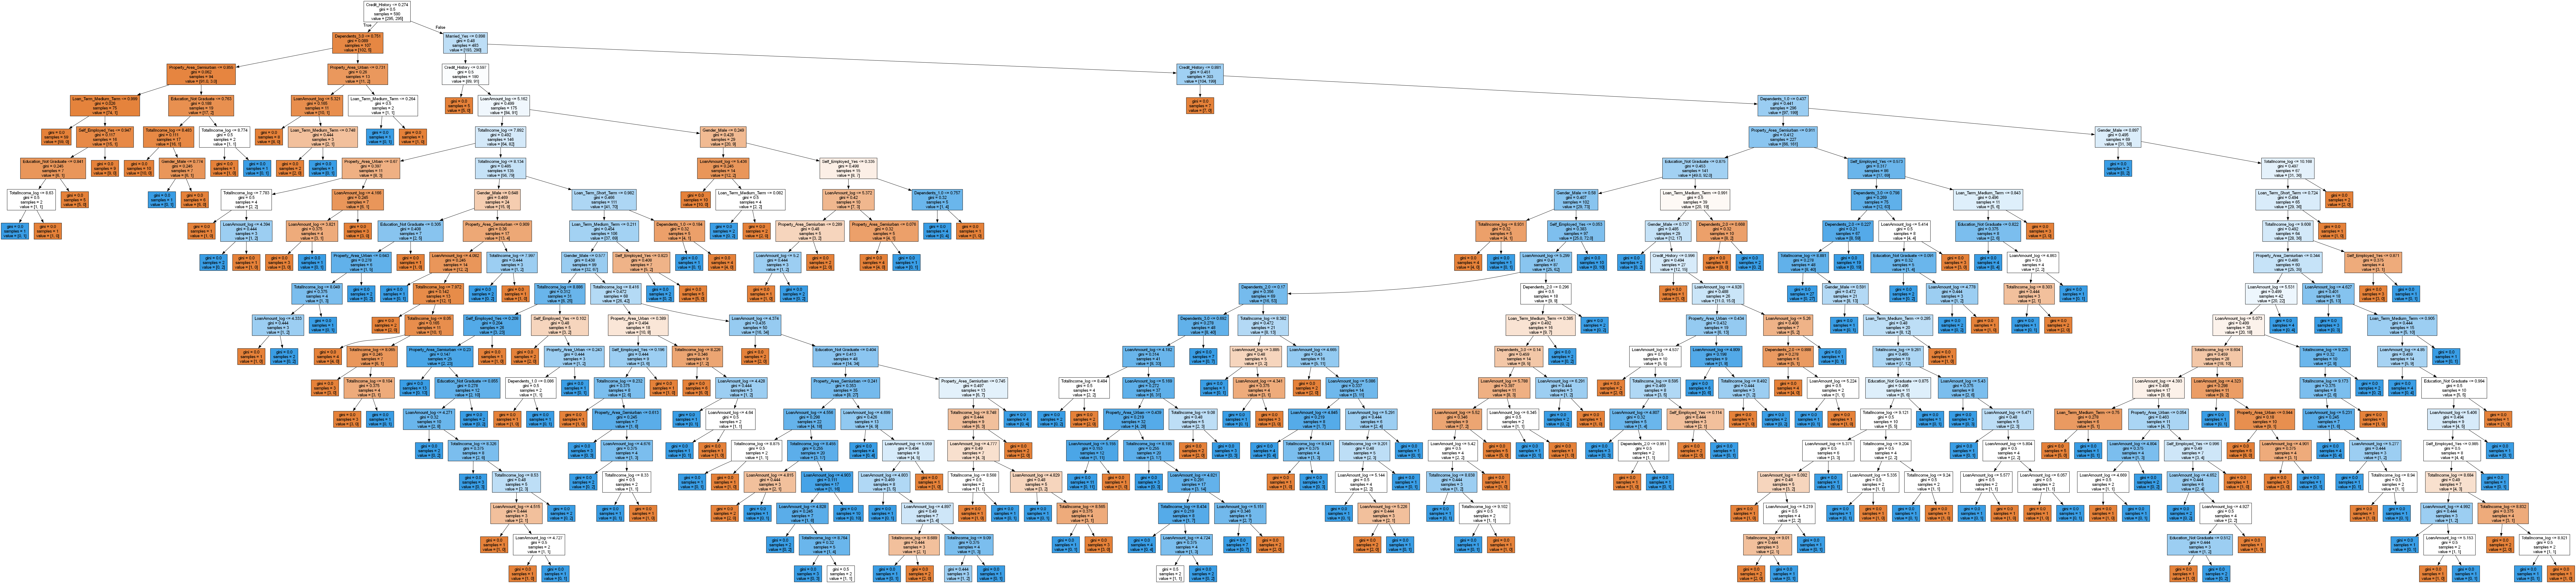

In [1477]:
from IPython.display import Image
from six import StringIO
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [1478]:
# mlflow
run_mlflow(
    model=tree_cv, 
    run_name="Decision_Tree_GridSearch_Best", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


2025/12/15 20:26:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:26:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Decision_Tree_GridSearch_Best ---
Accuracy: 0.6865
Recall: 0.7087
MLflow Run ID: ba747488341d4fd89122cf3518d6f18c



### C.Random Forest

In [1479]:
n_estimators = [100, 500, 1000, 1500]
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Train Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.915493    0.734748       0.8    0.825120      0.825120
recall       0.661017    0.938983       0.8    0.800000      0.800000
f1-score     0.767717    0.824405       0.8    0.796061      0.796061
support    295.000000  295.000000       0.8  590.000000    590.000000
_______________________________________________
Confusion Matrix: 
 [[195 100]
 [ 18 277]]

Test Result:
Accuracy Score: 79.46%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.685185    0.839695  0.794595    0.762440      0.791254
recall      0.637931

In [1480]:
# 1. Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Min samples required at a leaf node
}

# 2. Initialize the base model
rf = RandomForestClassifier(random_state=42)

# 3. Initialize GridSearchCV
# cv=5: Uses 5-fold cross-validation
# n_jobs=-1: Uses all available processor cores to speed up calculation
# verbose=2: Prints progress to the console
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# 4. Fit the GridSearch to the training data
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# 5. Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"\nBest Parameters found: {best_params}")

# 6. Predict using the best model
y_pred_grid = best_rf_model.predict(X_test)

# 7. Evaluate
print("\nAccuracy of Best Model:", accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))

Starting Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy of Best Model: 0.7621621621621621

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64        58
           1       0.84      0.80      0.82       127

    accuracy                           0.76       185
   macro avg       0.73      0.74      0.73       185
weighted avg       0.77      0.76      0.77       185



In [1481]:
#mlflow
run_mlflow(
    model=best_rf_model, 
    run_name="Random_Forest_GridSearch_Best", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/15 20:29:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:29:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: Random_Forest_GridSearch_Best ---
Accuracy: 0.7622
Recall: 0.8031
MLflow Run ID: c8314edf1d3b4b8c9943fc86cb4c9fd2



### D.Ada Boosting 

In [1482]:
# 1. Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),  # Standard stump (default)
        DecisionTreeClassifier(max_depth=2)   # Slightly deeper tree for complexity
    ]
}

# 2. Initialize the base model
ada = AdaBoostClassifier(random_state=42)

# 3. Initialize GridSearchCV
# scoring='accuracy': Optimize for overall correctness.
# If recall is more important, you can change this to 'recall' or 'f1'.
grid_search_ada = GridSearchCV(
    estimator=ada, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    scoring='accuracy'
)

# 4. Fit the GridSearch
print("Starting AdaBoost Grid Search...")
grid_search_ada.fit(X_train, y_train)

# 5. Get best parameters and model
best_params_ada = grid_search_ada.best_params_
best_ada_model = grid_search_ada.best_estimator_

print(f"\nBest Parameters found: {best_params_ada}")

# 6. Predict using the best model
y_pred_grid_ada = best_ada_model.predict(X_test)

# 7. Evaluate
print("\nAccuracy of Best AdaBoost Model:", accuracy_score(y_test, y_pred_grid_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid_ada))

Starting AdaBoost Grid Search...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Parameters found: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.5, 'n_estimators': 50}

Accuracy of Best AdaBoost Model: 0.7135135135135136

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.69      0.60        58
           1       0.84      0.72      0.78       127

    accuracy                           0.71       185
   macro avg       0.68      0.71      0.69       185
weighted avg       0.74      0.71      0.72       185



In [1483]:
#mlflow
run_mlflow(
    model=best_ada_model, 
    run_name="AdaBoost_GridSearch_Best", 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test
)

2025/12/15 20:30:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:30:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


--- Run: AdaBoost_GridSearch_Best ---
Accuracy: 0.7135
Recall: 0.7244
MLflow Run ID: 765f7436ffb34c50adfb8675b2646dfe



# 📊 Model Performance Comparison

| Rank | Run Name | Accuracy | Precision | Recall | F1-Score |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 1 | **AdaBoost_GridSearch_Best** | 71.4% | 83.6% | 72.4% | 77.6% |
| 2 | **Random_Forest_GridSearch_Best** | 76.2% | 84.3% | 80.3% | 82.3% |
| 3 | **Decision_Tree_GridSearch_Best** | 68.6% | 81.1% | 70.9% | 75.6% |
| 4 | **Logistic_Regression_L1_GridSearch** | **85.9%** | 83.9% | **98.4%** | **90.6%** |
| 5 | **Logistic_Regression_L2_GridSearch** | 80.0% | 85.2% | 85.8% | 85.5% |
| 6 | **AdaBoost_Tuned** | 84.9% | 82.8% | **98.4%** | 89.9% |
| 7 | **Random_Forest_tuned** | 77.3% | 82.9% | 84.3% | 83.6% |
| 8 | **Decision_Tree_Tuned** | 80.5% | 83.7% | 89.0% | 86.3% |
| 9 | **Logistic_Regression_L1_Tuned** | 81.6% | **86.0%** | 87.4% | 86.7% |
| 10 | **Logistic_Regression_L2_Tuned** | 81.6% | **86.0%** | 87.4% | 86.7% |
| 11 | **Logistic_Regression (Baseline)** | 80.0% | 85.2% | 85.8% | 85.5% |

## ⚙️ Technologies Used
* **Python 3.x**
* **Pandas & NumPy** (Data Manipulation)
* **Matplotlib & Seaborn** (Visualization)
* **Scikit-Learn** (Model Training & GridSearch)
* **Imbalanced-Learn** (SMOTE)
* **MLflow** (Experiment Tracking)